In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

plt.style.use('_mpl-gallery-nogrid')

figs_path = Path('/home/dev/master-thesis/tex/figs')

In [2]:
path = '/home/dev/master-thesis/documents/QnA_OSM.xlsx'

questions_df = pd.read_excel(path, sheet_name='Questions').dropna(how='all')
tests_df = pd.read_excel(path, sheet_name='Tests').dropna(how='all')

In [3]:
questions_df.head()

,Query ID,Query,Correct Response,Steps,Difficulty
0,nidarosdomen_polygon_retrieval,Retrieve a polygon of Nidarosdomen.,Adding a polygon of Nidarosdomen to the map.,- Use the places_of_worship_polygons layer\n- ...,1
1,vestfold_bbox,Find the coordinates that define a the extent ...,Minimum longitude: 9.7553357\nMinimum latitude...,- Get the correct county outline from places_...,1
2,county_names,What are the name of the available couties?,"Nordland, Telemark, Troms, Rogaland, Vestland,...",- Get info about the 'places_polygons' dataset...,1
3,buildings_near_rivers_in_drammen,Find buildings in Drammen that are closer than...,Adding river and building close to rivers to t...,- Get building and wayerway data\n- Filter wat...,3
4,oslo_roads_maxspeed_hte_70_kmh,Retrieve roads in Oslo that have speed limit h...,Adding corresponding line segments to the map.,- Get line segments in the Oslo area using a b...,2


In [4]:
tests_df.head()

,Query ID,Agent Type,Outcome,Duration [s],Cost [$],LangSmith Traces,Comments
0,viken_dissolve,python,success,68.23,0.06345,8876e65c-3de6-4a58-8275-130580f71a39,/home/dev/master-thesis/tex/figs/viken_dissolv...
1,viken_dissolve,sql,partial success,26.49,0.01553,e438271a-3579-46a6-9b95-5709050f2bbc,/home/dev/master-thesis/tex/figs/viken_not_dis...
2,viken_dissolve,oaf,success,52.24,0.03393,48dee0fd-f6c9-4e51-af48-a247347c24df,/home/dev/master-thesis/tex/figs/viken_dissolv...
3,oslo_residental_difference,sql,success,168.13,0.02010,01881c33-7cae-4592-a282-d27ce9b77ade,/home/dev/master-thesis/tex/figs/oslo_ex_resid...
4,oslo_residental_difference,oaf,failure,119.39,0.02467,768df9a1-fa8b-4098-860e-f74fbeaf0074,/home/dev/master-thesis/tex/figs/oslo_ex_resid...


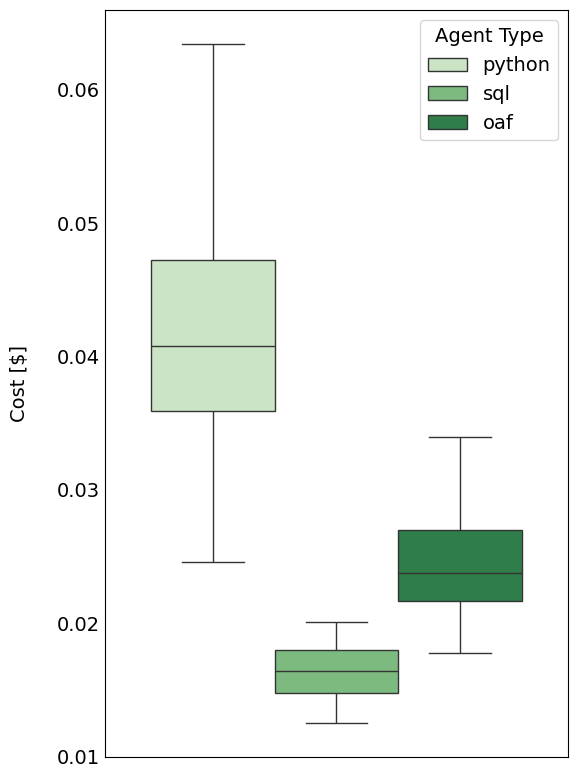

In [17]:
plt.rcParams.update({'font.size': 14})  # Set default font size for all plots

fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(hue="Agent Type", y="Cost [$]",
            data=tests_df, palette="Greens", ax=ax)

padding = 20
ax.set_ylabel('Cost [$]', labelpad=padding)

plt.tight_layout()
plt.savefig(figs_path / 'cost_box_plot.png')
plt.show()

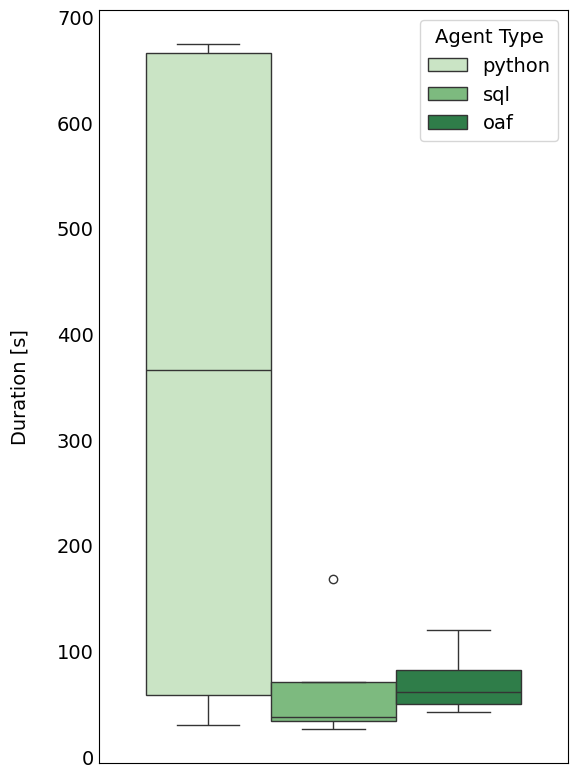

In [18]:
plt.rcParams.update({'font.size': 14})  # Set default font size for all plots

fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(hue="Agent Type", y="Duration [s]",
            data=tests_df, palette="Greens", ax=ax)

padding = 20
ax.set_ylabel('Duration [s]', labelpad=padding)

plt.tight_layout()
plt.savefig(figs_path / 'duration_box_plot.png')
plt.show()

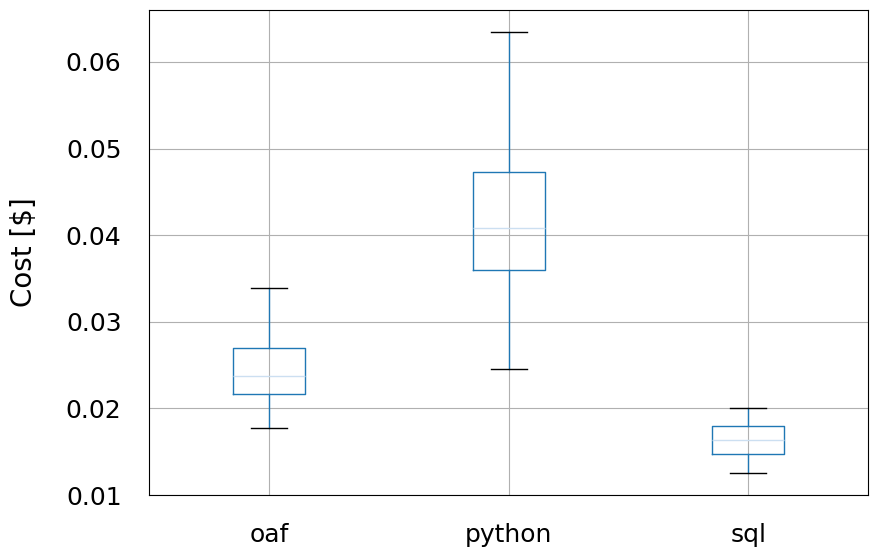

In [240]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 14})  # Set default font size for all plots
colors = plt.get_cmap('Greens')


fig, ax = plt.subplots(figsize=(9, 6))
tests_df.boxplot(column='Cost [$]', by='Agent Type', ax=ax)
plt.suptitle('')
plt.xlabel('')
plt.title('')


padding = 20
ax.set_ylabel('Cost [$]', fontsize=20, labelpad=padding)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=18, pad=padding)
ax.set_xlim(0.5, 3.5)

plt.tight_layout()  
plt.savefig(figs_path / 'cost_box_plot.png')
plt.show()

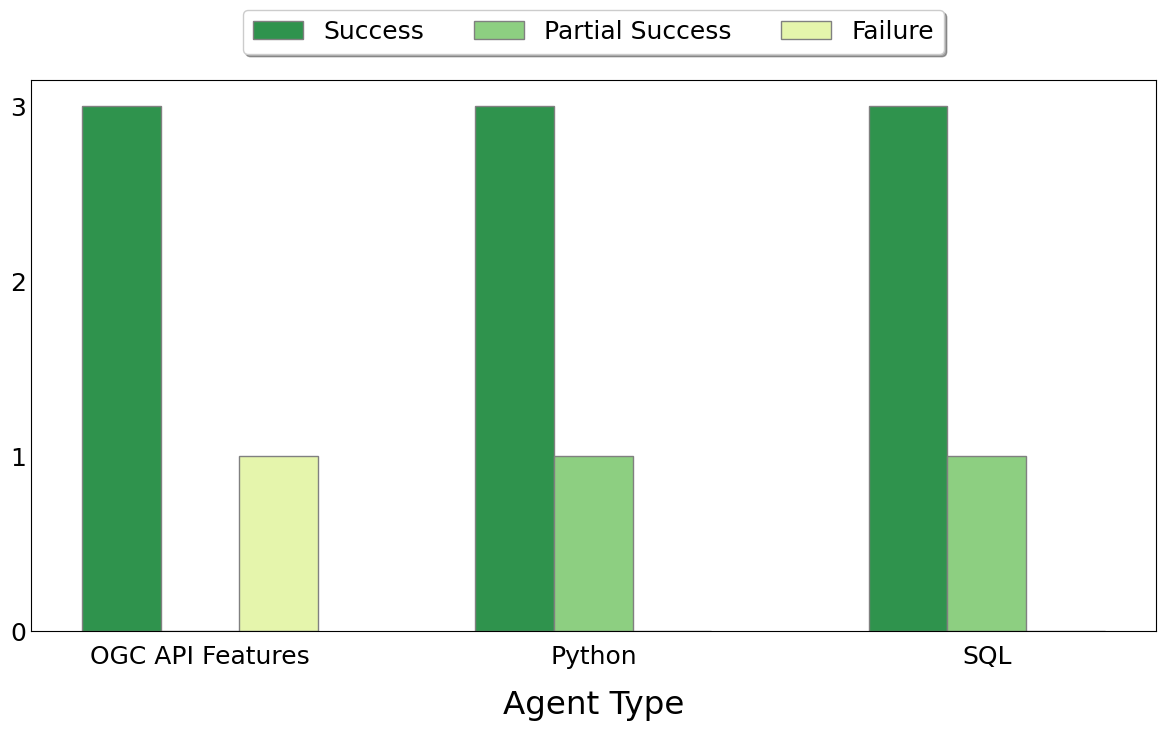

In [71]:
import numpy as np
import matplotlib.pyplot as plt

font_size = 18
plt.rcParams.update({'font.size': font_size})
barWidth = 0.2
fig = plt.subplots(figsize=(12, 8))

def counter(value):
    count_df = tests_df[tests_df['Outcome'] == value].groupby(
        'Agent Type').size().reset_index(name=f'count')
    all_agent_types = tests_df['Agent Type'].unique()
    count_df = count_df.set_index('Agent Type').reindex(
        all_agent_types, fill_value=0).reset_index()
    return count_df.sort_values(by='Agent Type')

success_count = counter('success')
partial_success_count = counter('partial success')
failure_count = counter('failure')

br1 = np.arange(len(success_count))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

colors = plt.get_cmap('YlGn')(np.linspace(0.2, 0.7, 3))

plt.bar(br1, success_count['count'], color=colors[2], width=barWidth,
        edgecolor='grey', label='Success')
plt.bar(br2, partial_success_count['count'], color=colors[1], width=barWidth,
        edgecolor='grey', label='Partial Success')
plt.bar(br3, failure_count['count'], color=colors[0], width=barWidth,
        edgecolor='grey', label='Failure')

max_count = max(success_count['count'].max(),
                partial_success_count['count'].max(),
                failure_count['count'].max())
plt.xlabel('Agent Type', fontsize=font_size * 1.3, labelpad=15)
plt.yticks(range(int(max_count) + 1))
plt.xticks([r + barWidth for r in range(len(success_count))],
           ['OGC API Features', 'Python', 'SQL'])
plt.tick_params(axis='x', which='major', pad=10)


plt.legend(loc='upper center', bbox_to_anchor=(
    0.5, 1.15), fancybox=True, shadow=True, ncol=3)
plt.tight_layout()
plt.savefig(figs_path / 'outcome_distribution_bar_chart.png')
plt.show()

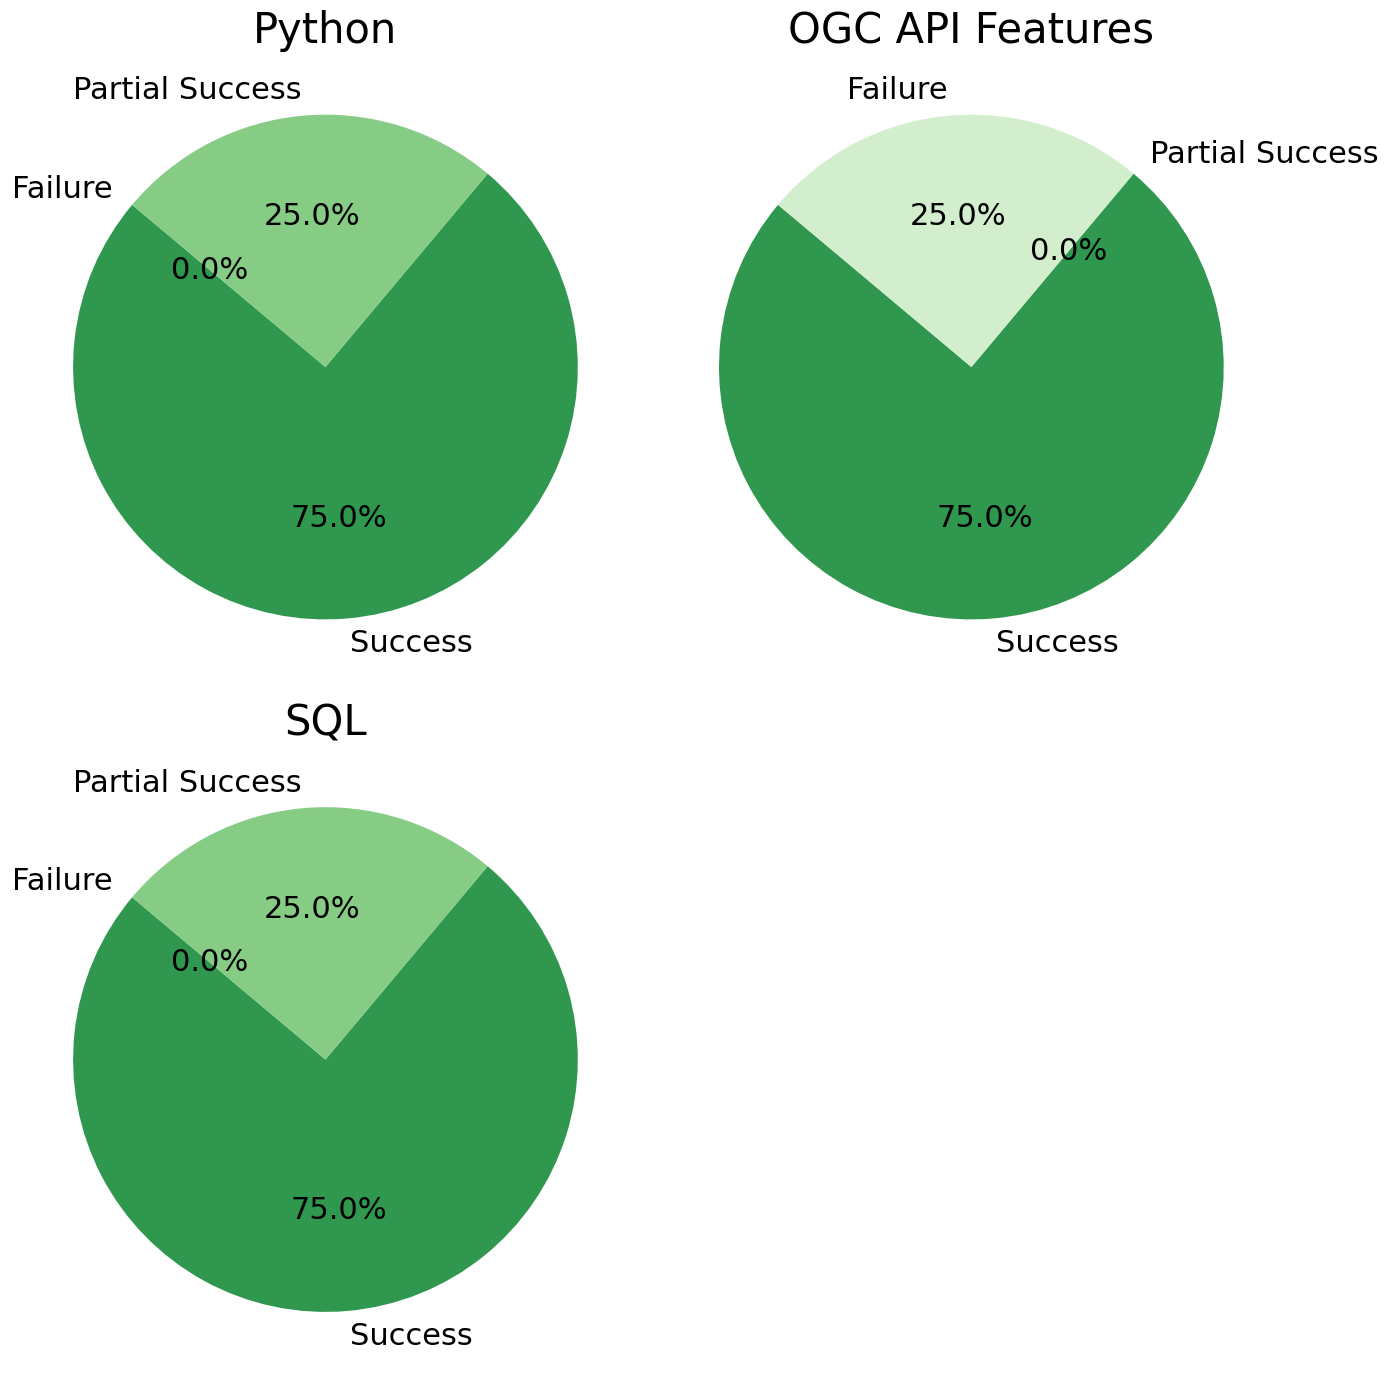

In [198]:
import matplotlib.pyplot as plt
import numpy as np

outcome_categories = ['success', 'partial success', 'failure']

df_python = tests_df[tests_df['Agent Type'] == 'python']
df_oaf = tests_df[tests_df['Agent Type'] == 'oaf']
df_sql = tests_df[tests_df['Agent Type'] == 'sql']

counts_python = df_python['Outcome'].value_counts()
counts_oaf = df_oaf['Outcome'].value_counts()
counts_sql = df_sql['Outcome'].value_counts()

counts_python = counts_python[counts_python.index.isin(outcome_categories)]
counts_oaf = counts_oaf[counts_oaf.index.isin(outcome_categories)]
counts_sql = counts_sql[counts_sql.index.isin(outcome_categories)]

labels = ['Success', 'Partial Success', 'Failure']

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

colors = plt.get_cmap('Greens')(np.linspace(0.7, 0.2, 3))

# Flatten the axes array into a 1D array
axes_flat = axs.ravel()

for idx, ax in enumerate(axes_flat):
    if idx == 3:  # Skip the empty subplot
        ax.set_visible(False)
        continue

    i, j = divmod(idx, 2)  # Convert single index to row and column indices
    agent_type = ['Python', 'OGC API Features', 'SQL'][idx]
    counts = [counts_python, counts_oaf, counts_sql][idx]

    counts = counts.reindex(outcome_categories, fill_value=0)
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=140, colors=colors, textprops=dict(color="k", size=22))
    ax.set_aspect('equal')
    ax.set_title(agent_type, size=30)

plt.tight_layout()
plt.savefig(figs_path / 'outcome_distribution.png')
plt.show()